In this notebook we explore the methods ans atributes of the classes in the library.

Importing the library

In [1]:
#importing epidemickabu
import epidemickabu as ek

# importing other necesary libraries
import pandas as pd
import matplotlib.pyplot as plt

epidemickabu has 3 classes

Defining the variables to use

In [2]:

# The dataframe with the columns dates and cases by date
database = pd.read_csv("/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabuLibrary/examples/data/dataCountryCOVID19K5.csv")
database = database[["Date","NewCases","Country"]]
databaseCOLOMBIA=database[database["Country"]=="Colombia"]
datesName = "Date"
casesName = "NewCases"
databaseCOLOMBIA.head(3)

# The next dataframe has the kernel values for the countries
configFile= pd.read_csv("/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabuLibrary/examples/data/configurationFile.csv")
configFile.head(3)

# the names of the output files
plotNameW = "Epidemic_curve_Colombia_W_exploringErrors"
dfNameW = "Epidemic_curve_Colombia_W_exploringErrors"
plotNamePV = "Epidemic_curve_Colombia_PV_exploringErrors"
dfNamePV = "Epidemic_curve_Colombia_PV_exploringErrors"

#Be sure to create the "./plots/" and "./dataframes" folder in the same folder in which you
#are running the code, or define the variables to set an specific directory
outFolderPlot= "/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabuLibrary/examples/plots/"
outFolderDF= "/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabuLibrary/examplesdataframes/"

# The threshols is optional by default is float('inf'). We declarate them but ...
thresholdW = float('inf')


Waves

In [3]:
# A simplier version with a kernels as a number an without customize the attributes with default values
example = ek.waves(databaseCOLOMBIA,datesName,casesName,42,42,plotNameW,dfNameW)
example.run()


Exploring attributes and methods of "example" object

In [4]:
example.__dict__

{'df':             Date  NewCases   Country  NormalizedCases  gaussian  \
 10584 2020-01-16  0.000000  Colombia         0.000000  0.000000   
 10585 2020-01-23  0.000000  Colombia         0.000000  0.000000   
 10586 2020-01-30  0.000000  Colombia         0.000000  0.000000   
 10587 2020-02-06  0.000000  Colombia         0.000000  0.000000   
 10588 2020-02-13  0.000000  Colombia         0.000000  0.000000   
 ...          ...       ...       ...              ...       ...   
 10831 2024-10-10  1.791998  Colombia         0.000443  0.096507   
 10832 2024-10-17  1.250809  Colombia         0.000309  0.142380   
 10833 2024-10-24  0.828350  Colombia         0.000205  0.187969   
 10834 2024-10-31  0.969170  Colombia         0.000240  0.222059   
 10835 2024-11-07  1.035438  Colombia         0.000256  0.234745   
 
        SmoothedNCases  SmoothedCases  FirstDerivate  FirstDerivateSmoothed  \
 10584        0.000002       0.006638            NaN               0.000022   
 10585        0.00

In [6]:
example.df

,Date,NewCases,Country,NormalizedCases,gaussian,SmoothedNCases,SmoothedCases,FirstDerivate,FirstDerivateSmoothed,SecondDerivate,rollingFDS,cutDatesW
10584,2020-01-16,0.000000,Colombia,0.000000,0.000000,0.000002,0.006638,NaN,0.000022,NaN,False,0
10585,2020-01-23,0.000000,Colombia,0.000000,0.000000,0.000004,0.017085,0.000003,0.000032,0.000011,0.0,0
10586,2020-01-30,0.000000,Colombia,0.000000,0.000000,0.000010,0.042418,0.000006,0.000049,0.000017,0.0,0
10587,2020-02-06,0.000000,Colombia,0.000000,0.000000,0.000025,0.100707,0.000014,0.000075,0.000025,0.0,0
10588,2020-02-13,0.000000,Colombia,0.000000,0.000000,0.000056,0.226688,0.000031,0.000113,0.000038,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10831,2024-10-10,1.791998,Colombia,0.000443,0.096507,0.000553,2.236452,-0.000135,-0.000175,0.000033,0.0,0
10832,2024-10-17,1.250809,Colombia,0.000309,0.142380,0.000457,1.847540,-0.000096,-0.000146,0.000030,0.0,0
10833,2024-10-24,0.828350,Colombia,0.000205,0.187969,0.000389,1.575122,-0.000067,-0.000120,0.000025,0.0,0
10834,2024-10-31,0.969170,Colombia,0.000240,0.222059,0.000343,1.386503,-0.000047,-0.000100,0.000020,0.0,0


In [7]:
example.df.cutDatesW.unique()

array([0])

The kernels are used to smooth the epidemic curve of cases and the first derivative

In [10]:
def kernelPlot(k):
    example = ek.curves(databaseCOLOMBIA,datesName,casesName,k,k,plotNameW,dfNameW)
    example.run()
    plt.plot(example.df["Date"],example.df["NewCases"],color="gray")
    plt.plot(example.df["Date"],example.df["SmoothedCases"],color="red")
    plt.show()
    plt.plot(example.df["Date"],example.df["FirstDerivate"],color="gray")
    plt.plot(example.df["Date"],example.df["FirstDerivateSmoothed"],color="red")

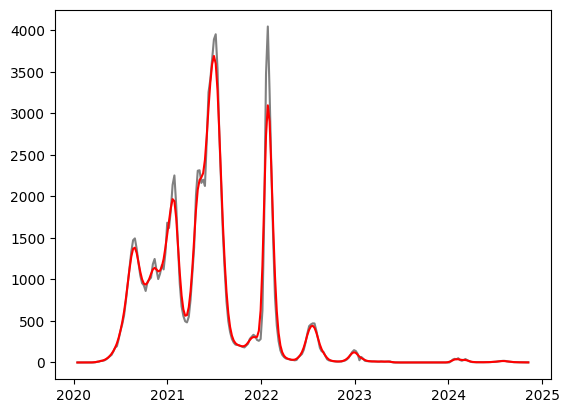

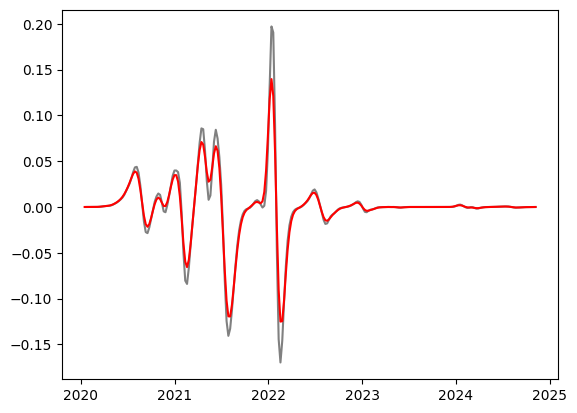

In [11]:
kernelPlot(20)

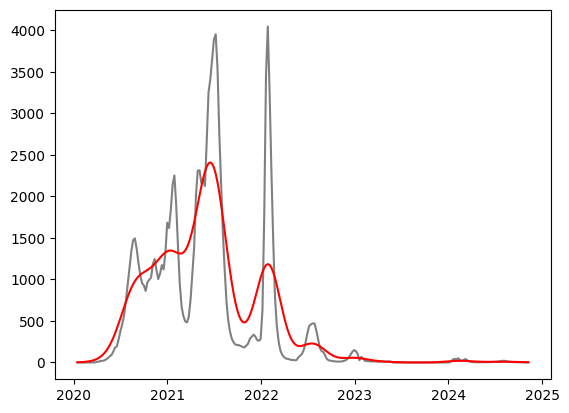

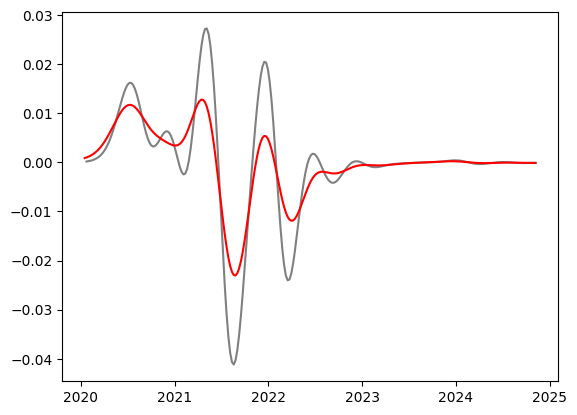

In [12]:
kernelPlot(90)

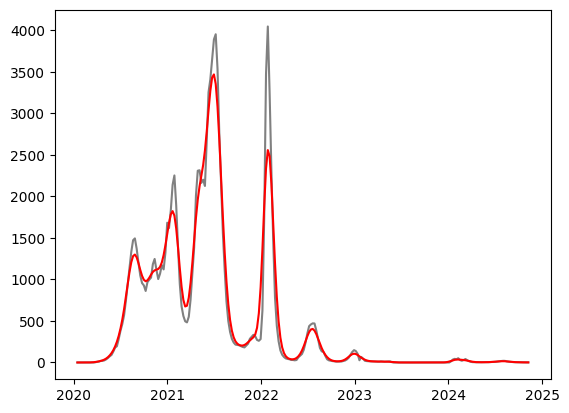

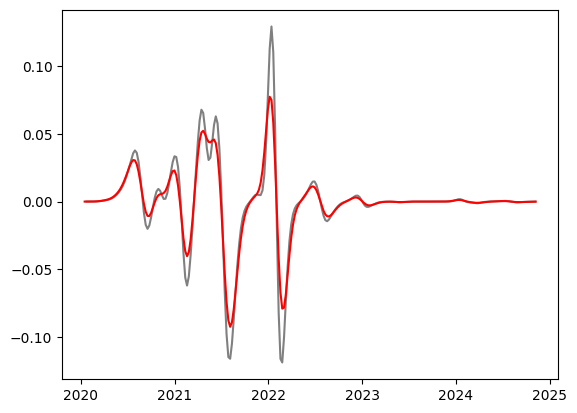

In [13]:
kernelPlot(30)

We used the **first derivative** to detect the waves and **second derivative** to filter them

In [14]:
def changeThr(k,thr):
    
    example = ek.waves(databaseCOLOMBIA,datesName,casesName,k,k,plotNameW,dfNameW, thresholdW=thr)
    example.run()
    
    plt.plot(example.df["Date"],example.df["SmoothedNCases"],color= "red")
    plt.plot(example.df["Date"],example.df["FirstDerivateSmoothed"]/example.df["FirstDerivateSmoothed"].max(),color= "blue", linewidth = '0.7')
    plt.plot(example.df["Date"],example.df["SecondDerivate"]/example.df["SecondDerivate"].max(),color= "black" ,linewidth = '1')
    plt.axhline(y=0,  color='gray')
    for date in example.cutDatesW:
        plt.axvline(x=date, color='black', linestyle='--', linewidth=.91)
    plt.show()
    
    plt.plot(example.df["Date"],example.df["NormalizedCases"],color= "gray", linewidth = '0.7')
    plt.plot(example.df["Date"],example.df["SmoothedNCases"],color= "red" ,linewidth = '1')
    for date in example.cutDatesW:
        plt.axvline(x=date, color='black', linestyle='--', linewidth=.91)

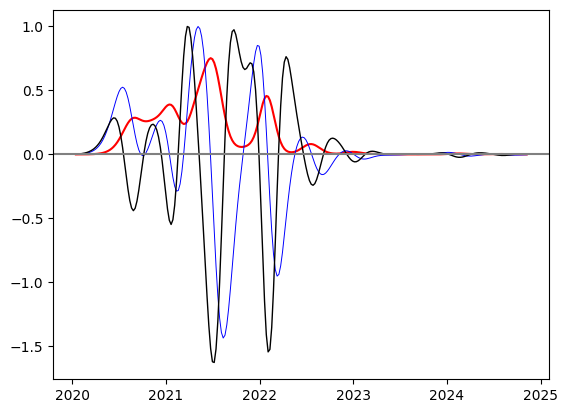

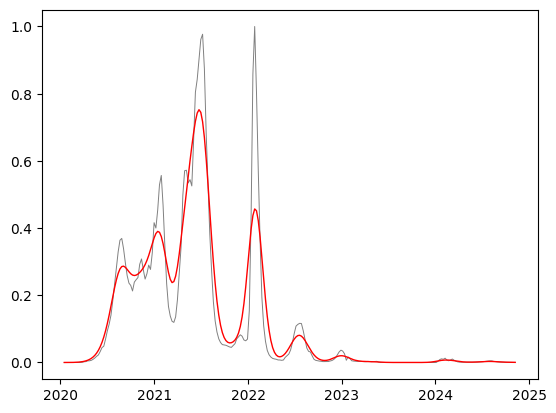

In [17]:
changeThr(50,1)

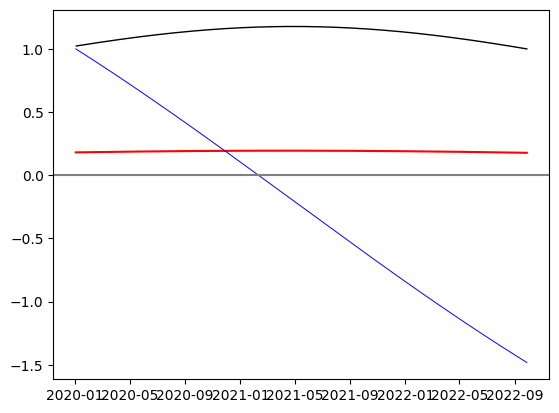

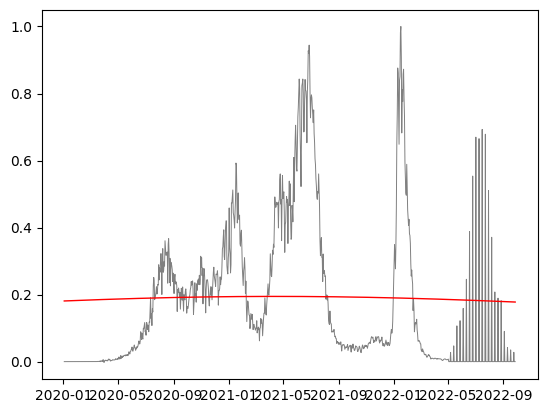

In [18]:
changeThr(1000.9,1)

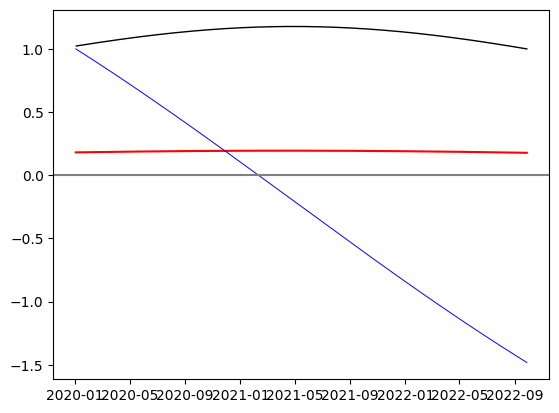

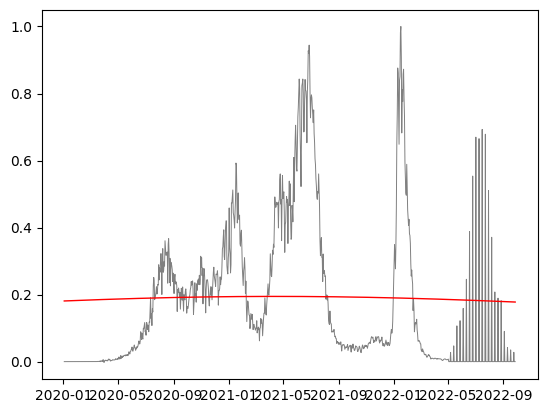

In [ ]:
changeThr(1000.9,1)

Making the previous plot for all the countries in the database

In [63]:
def plotDerivatives(database,datesName,casesName,value,plotsName,dfName,thr):
    
    kernel1=[configFile,"Code",value,"kernel1"]
    kernel2=[configFile,"Code",value,"Kernel2"]
    
    test = ek.waves(
        database,
        datesName,
        casesName,
        kernel1,
        kernel2,
        plotsName,
        dfName,
        thr)
    
    #methods in the curves class (inherited in waves class)
    test.stansardizingDates()
    test.curveNormalization(casesName,"NormalizedCases")
    test.curveSmoothing2("NormalizedCases","SmoothedNCases",kernel1)
    test.discreteDerivative("SmoothedNCases","FirstDerivate")
    test.curveSmoothing2("FirstDerivate","FirstDerivateSmoothed",kernel2)
    test.discreteDerivative("FirstDerivateSmoothed","SecondDerivate")
    #methods in the waves class
    test.idenCutPointsW("FirstDerivateSmoothed","rollingFDS")
    test.idenPreviousDatesW("rollingFDS","FirstDerivateSmoothed")
    test.thresholdPos()
    #ploting the deivatives with the cutDatesW
    plt.plot(test.df["Date_reported"],test.df["SmoothedNCases"],color= "red")
    plt.plot(test.df["Date_reported"],test.df["FirstDerivateSmoothed"]/test.df["FirstDerivateSmoothed"].max(),color= "blue", linewidth = '0.7')
    plt.plot(test.df["Date_reported"],test.df["SecondDerivate"]/test.df["SecondDerivate"].max(),color= "black" ,linewidth = '1')
    plt.axhline(y=0,  color='gray')
    for date in test.cutDatesW:
        plt.axvline(x=date, color='black', linestyle='--', linewidth=.91)
    plt.title(plotsName)
    plt.show()

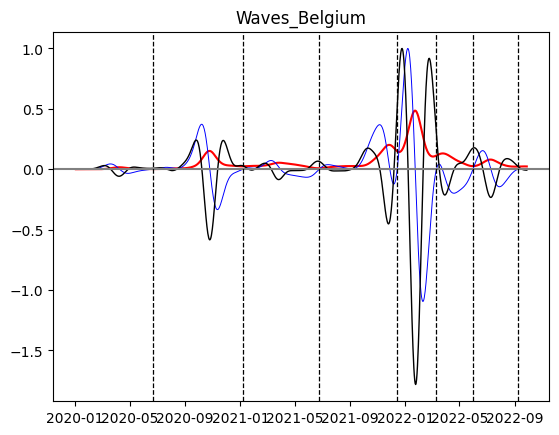

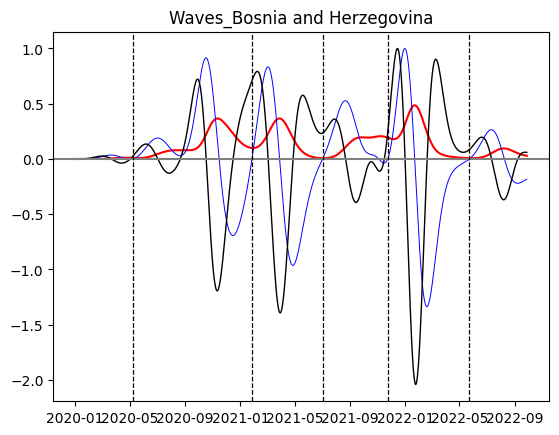

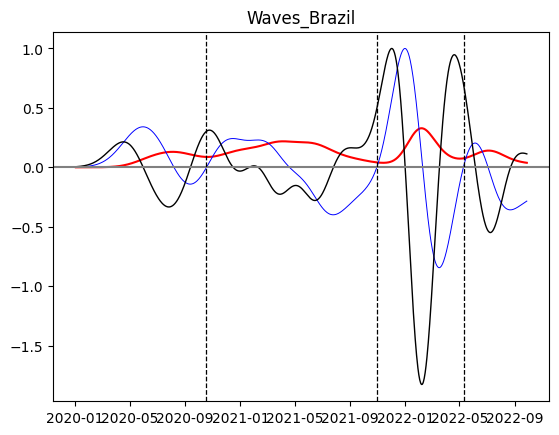

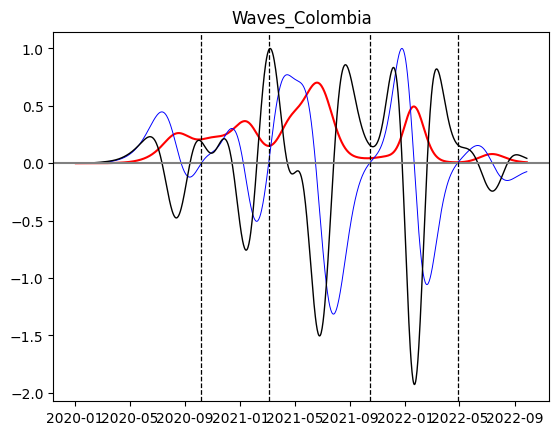

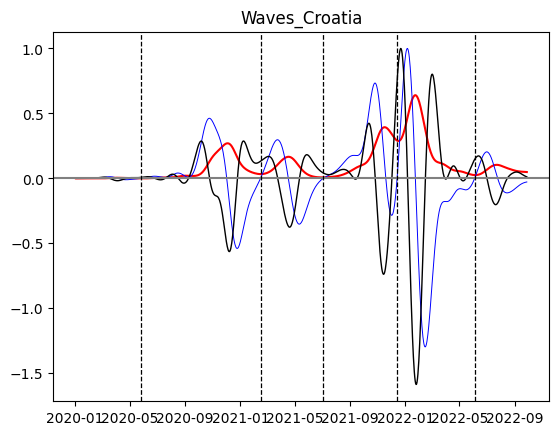

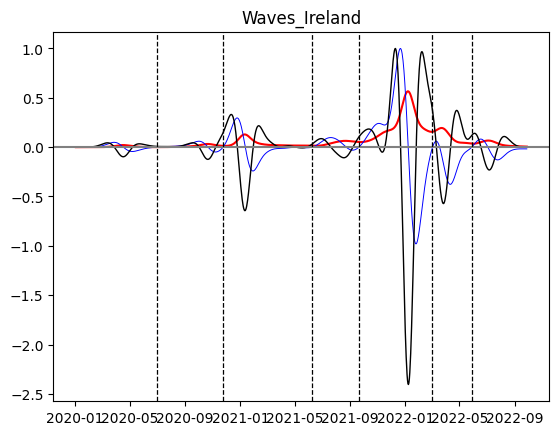

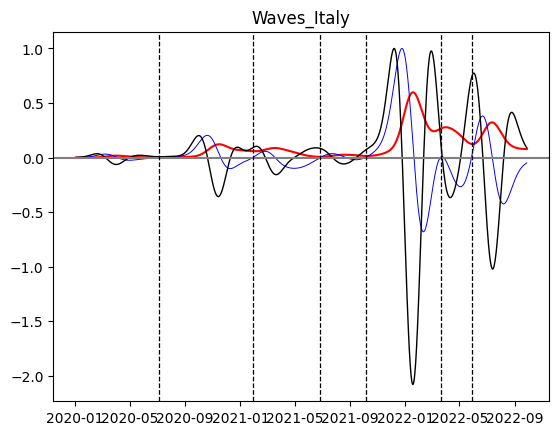

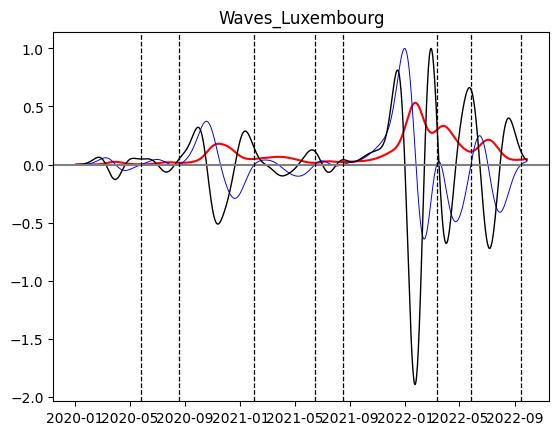

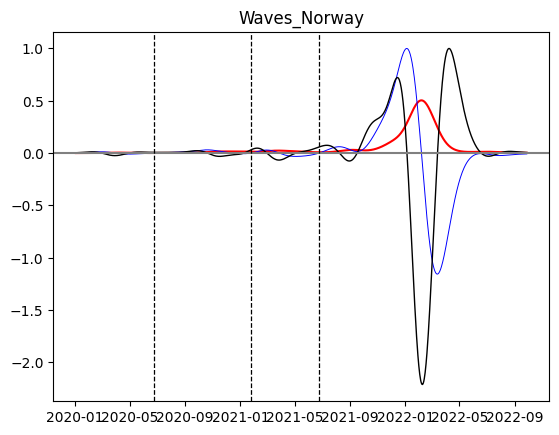

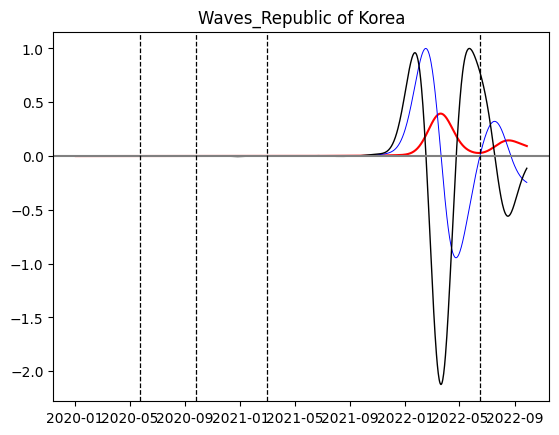

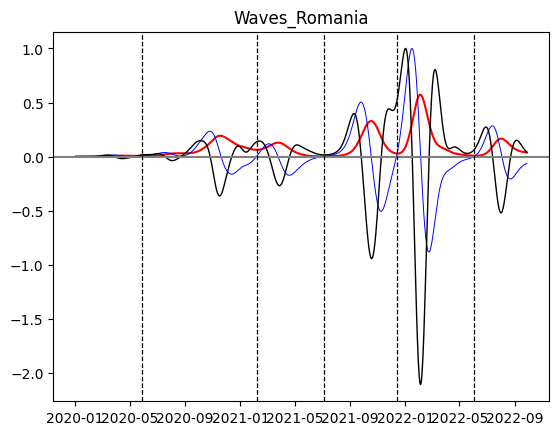

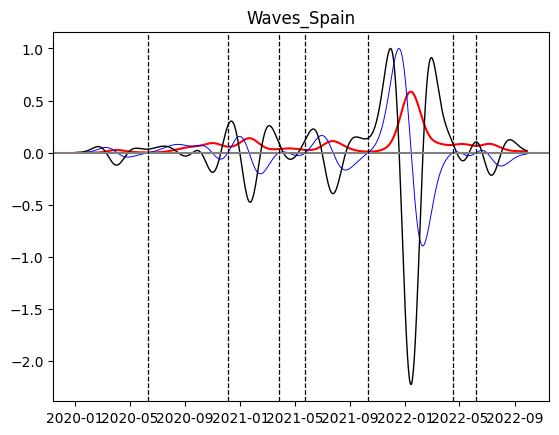

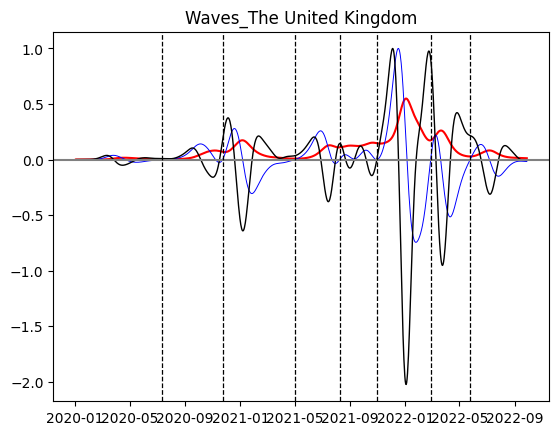

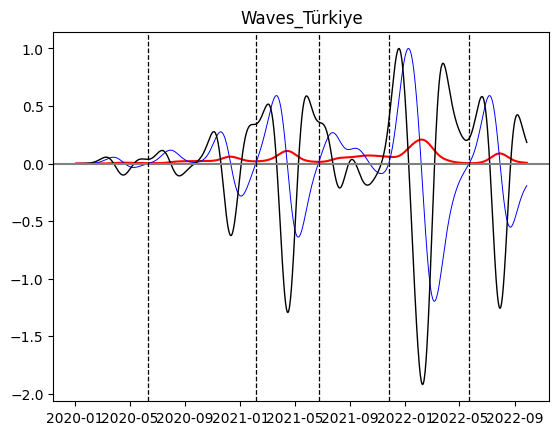

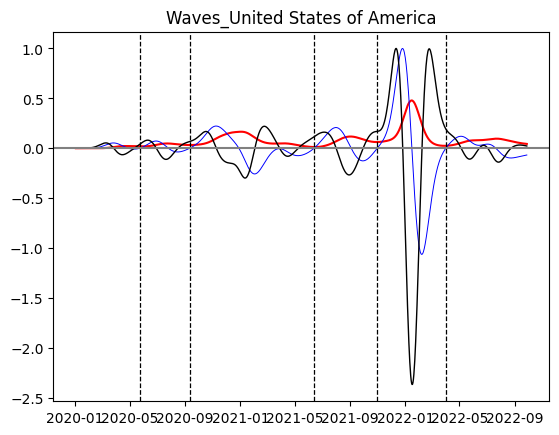

""


In [64]:
#using the function with the complete database 
database.groupby("Country").apply(lambda x : plotDerivatives(
    x[["Date_reported","New_cases"]],
    datesName,
    casesName,
    x["Country_code"].iloc[0],
    "Waves_"+ x["Country"].iloc[0],
    "Waves_"+ x["Country"].iloc[0],
    1
    ))

The range for the values of the second derivative allows to set the **threshold** to filter the dates deliminiting the **waves**. 

In [3]:
valuesMinMaxSD=[]

def rangeSD(database,datesName,casesName,value,plotsName,dfName):
    
    kernel1=[configFile,"Code",value,"kernel1"]
    kernel2=[configFile,"Code",value,"Kernel2"]
    test = ek.waves(
        database,
        datesName,
        casesName,
        kernel1,
        kernel2,
        plotsName,
        dfName)
    #methods in the curves class (inherited in waves class)
    test.stansardizingDates()
    test.curveNormalization(casesName,"NormalizedCases")
    test.curveSmoothing2("NormalizedCases","SmoothedNCases",kernel1)
    test.curveSmoothing2(casesName,"SmoothedCases",kernel1)
    test.discreteDerivative("SmoothedNCases","FirstDerivate")
    test.curveSmoothing2("FirstDerivate","FirstDerivateSmoothed",kernel2)
    test.discreteDerivative("FirstDerivateSmoothed","SecondDerivate")
    #methods in the waves class
    test.idenCutPointsW("FirstDerivateSmoothed","rollingFDS")
    test.idenPreviousDatesW("rollingFDS","FirstDerivateSmoothed")  
    df=test.df
    d1=df[df["cutDatesW"]==1]["SecondDerivate"]
    valuesMinMaxSD.append(min(d1))
    valuesMinMaxSD.append(max(d1))
    #print(plotsName+" yes min" if min(d1) > 0 else "no")
    #print(plotsName+" yes max" if max(d1) < 0.1 else "no")

In [4]:
#using the function with the complete database 
database.groupby("Country").apply(lambda x : rangeSD(
    x[["Date_reported","New_cases"]],
    datesName,
    casesName,
    x["Country_code"].iloc[0],
    "Waves_"+ x["Country"].iloc[0],
    "Waves_"+ x["Country"].iloc[0]
    ))

""


In [ ]:
min(valuesMinMaxSD)

5.854450825079219e-08

In [ ]:
max(valuesMinMaxSD)

0.0004702239724957346

Now that we know the ranges of the second derivative, we could set some values for the **threshold**. The next is an example for the Colombia database 

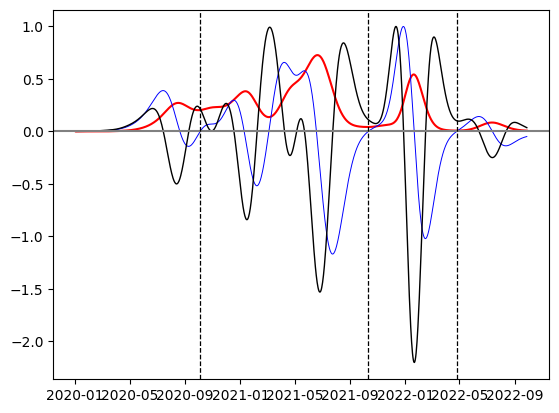

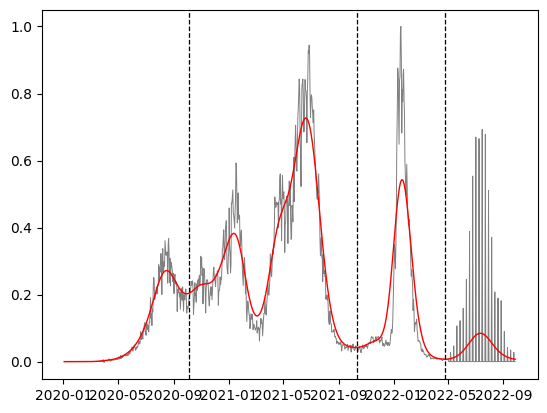

In [13]:
changeThr(30,0.00015)